# **Neuronske mreže - Klasifikacija mobilnih telefona**
**Studenti**: 
 - Natalija Stamenković, 1258
 - Milica Todorović, 1256

**Tema**: Predikcija klase cene mobilnih telefona na osnovu datih karakteristika. Korišćeni skup podataka može se naći na linku: https://www.kaggle.com/iabhishekofficial/mobile-price-classification.

### ***Deskriptivna analiza podataka***
#### *Importovanje paketa*

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from tensorflow.keras import layers, regularizers, models, Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import plot_model
%matplotlib inline

pd.set_option('display.max_columns', None)

#### *Učitavanje skupa podataka*
U tabeli se mogu videti vrednosti atributa datog skupa podataka. Svi atributi su numeričkog tipa. Klasifikaciju je potrebno izvršiti na osnovu poslednje kolone (*price_range*), pri čemu zavisna promenljiva uzima celobrojne vrednosti iz intervala [0,3] i označava klasu cene telefona (0 - najjefitniji, 3 - najskuplji telefoni).

In [7]:
data = pd.read_csv("train.csv")
data.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2


#### *Provera nedefinisanih vrednosti*
Vrši se provera da li postoje atributi koji sadrže određene *missing* vrednosti (vrednosti koje fale). Pokazuje se da podaci ne sadrže nedefinisane vrednosti.

In [ ]:
def check_missing_vals(data):
    # check for missing values
    missing_vals = data.isna().sum()
    print("Missing values: \n" + str(missing_vals))
    return missing_vals.sum() != 0

print("Missing values?:", check_missing_vals(data))

Missing values: 
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
Missing values?: False


#### *Deskripcija atributa*
Sledeća tabela prikazuje statističke informacije o atributima (srednju vrednost, standardnu devijaciju, min, max itd.)

In [ ]:
print("Describe data:")
data.describe(include='all')

Describe data:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Može se uočiti da atributi *px_height* (visina ekrana u pikselima) i *sc_w* (širina ekrana) za minimalnu vrednost imaju 0, što je nevalidan podatak, s obzirom da se radi o merama veličine telefona. Atributi *fc* (rezolucija prednje kamere) i *pc* (rezolucija zadnje kamere) takođe sadrže 0 kao vrednost, ali se ovaj podatak uzima kao oznaka nepostojanja datog tipa kamere na telefonu.

#### *Nevalidne vrednosti*
Potvrđivanje prethodnog zapažanja izvršeno je određivanjem broja 0 vrednosti u atributima *px_height* i *sc_w*.

In [ ]:
def check_count_of_value(data, column, value):
    return data[column].isin([value]).sum()

print("No. of 0 values in px_height:", 
      check_count_of_value(data, 'px_height', 0))

No. of 0 values in px_height: 2


In [ ]:
print("No. of 0 values in sc_w:", 
      check_count_of_value(data, 'sc_w', 0))

No. of 0 values in sc_w: 180


Date nevalidne vrednosti zamenjene su median vrednostima respektivnih atributa.

In [8]:
def replace_zero_vales_with_median(data):
    columns=["px_height", "sc_w"]
    for column in columns:
        median_value = data[column].median()
        data = data.replace({column: {0: median_value}})
    return data

data = replace_zero_vales_with_median(data)

#### *Countplot price_range atributa*
Na sledećem grafiku prikazan je histogram atributa *price_range*. Može se uočiti da su klase dobro balansirane.

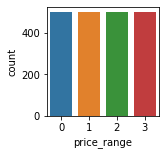

In [ ]:
def plot_count(data, data_column):
    plt.figure(figsize=(2, 2))
    sns.countplot(x=data_column, data=data)
    
plot_count(data=data, data_column='price_range')

#### *Boxplot atributa*
Sledeći grafik prikazuje boxplot dijagram za svaki od atributa. Dijagram ne uključuje kategoričke atribute (*blue*, *dual_sim*, *four_g*, *three_g*, *touch_screen* i *wifi*), s obzirom da su vrednosti binarne, kao i atribut klase *price_range*. Može se uočiti minimalni broj outlier-a u *fc* i *px_height* atributima.

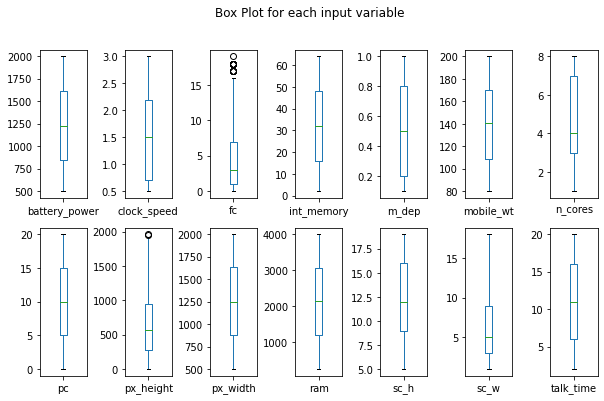

In [ ]:
def plot_boxplot(data):
    data.plot(kind='box', figsize=(10, 6), subplots=True, layout=(2,7),
              sharex=False, sharey=False,
              title='Box Plot for each input variable')
    plt.subplots_adjust(wspace=0.8)

plot_boxplot(data.drop(['blue', 'dual_sim', 'four_g', 
                        'three_g', 'touch_screen', 'wifi', 'price_range'], axis=1))

#### *Raspodela vrednosti atributa po klasama*
Može se vizuelizovati raspodela vrednosti atributa po klasama. Može se uočiti očigledna rastuća zavisnost između *battery_power*, *ram* i klase cene telefona, kao i druge interesantne zavisnosti.

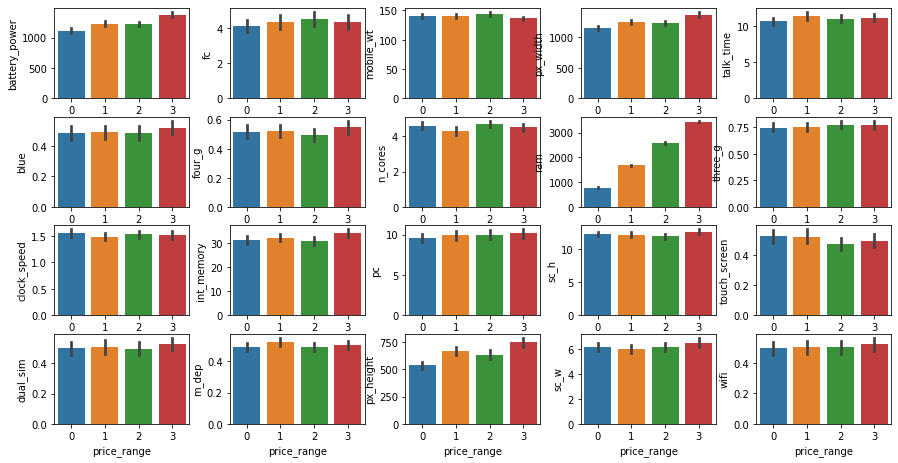

In [ ]:
def plot_barplots(data):
    num_rows = 4
    num_cols = 5
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15,7))
    plt.subplots_adjust(wspace=0.3, top=0.95)

    for i in range(0, num_rows):
        for j in range(0, num_cols):
            index = j * num_rows + i
            col_name = data.columns[index]
            sns.barplot(x='price_range', y=col_name, data=data, ax=axs[i][j])

plot_barplots(data)

#### *Matrica korelacije*
Dijagram prikazuje matricu korelacije fičera. Takođe, se štampaju fičeri sortirani po koeficijentu korelacije u opadajućem poredku, u odnosu na zavisnu klasifikacionu promenljivu.
Može se uočiti da atribut *ram* ima najveći stepen korelacije sa atributom *price_range*, što je već uočeno na prethodnom dijagramu. Atributi *battery_power* i rezolucija ekrana imaju takođe relativno visok uticaj na cenu uređaja. Pored toga, primećuje se da su neki parovi atributa visoko korelisani (*fc* i *pc*, *four_g* i *three_g* itd.) ali je to za očekivati, s obzirom na prirodu datih atributa.

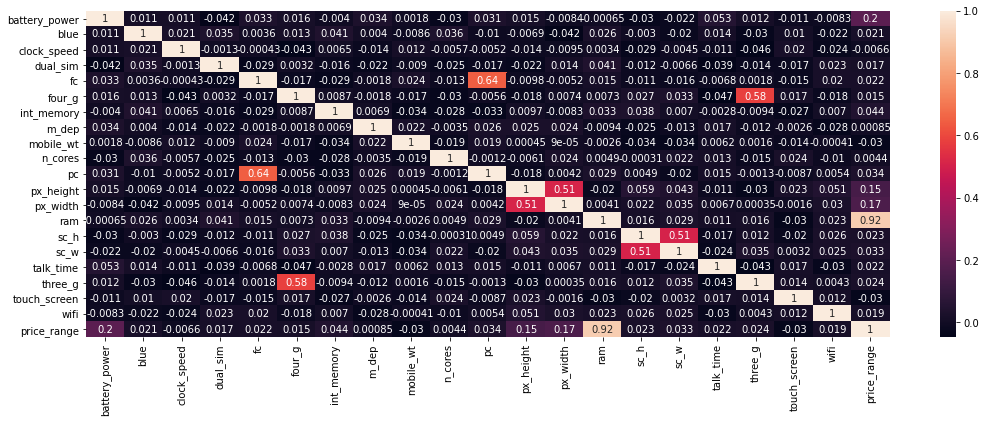

Sorted correlation values: 
 price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.149582
int_memory       0.044435
pc               0.033599
sc_w             0.032826
touch_screen     0.030411
mobile_wt        0.030302
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
clock_speed      0.006606
n_cores          0.004399
m_dep            0.000853
Name: price_range, dtype: float64


In [ ]:
def correlation_matrix(data):
    corr = data.corr()
    fig, ax = plt.subplots(figsize=(18, 6))
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, ax=ax)
    plt.show()

    corr = abs(corr['price_range']).sort_values(ascending=False)
    return corr

corr = correlation_matrix(data)
print("Sorted correlation values: \n", corr)

### ***Preprocesiranje podataka***
Kategorički atributi su već enkodirani te nije potrebno dodatno preprocesiranje ovog tipa. Potrebno je podeliti dati skup podataka na nezavisne promenljive (atribute - x) i zavisnu promenljivu (*price_range* - y). 

In [9]:
def extract_data(data):
    x = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    return x, y

x, y = extract_data(data)

Nakon toga, vrši se podela skupa podataka na trening i test skupove, pri čemu je za trening skup uzeto 20% celokupnog skupa.

In [10]:
def split_dataset(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = split_dataset(x, y)

Finalno, vrši se skaliranje vrednosti korišćenjem StandardScaler-a. Skaliranje se vrši zasebno na trening i test skupovima podataka, s obzirom da je potrebno tretirani test skup podataka kao podatke koji nisu prethodno "viđeni".

In [11]:
def scale_features(x_train, x_test):
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.fit_transform(x_test)
    return x_train, x_test

x_train_s, x_test_s = scale_features(x_train, x_test)

In [ ]:
df_train = pd.DataFrame(x_train_s)
df_train['price_range'] = y_train
df_train.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,price_range
0,1.548360,-0.981423,-1.236230,0.970437,0.620111,-1.046060,0.754832,-0.008935,1.425710,-1.547446,0.020269,0.274482,1.181997,-0.580476,-0.528061,0.715659,-1.445123,0.557137,0.99005,1.002503,1
1,-1.379535,1.018929,0.837112,-1.030464,-0.993561,0.955968,0.919763,-1.403674,-0.046246,1.510316,-1.476497,-0.260682,-0.556547,1.336453,-0.290196,-1.310537,0.915929,0.557137,0.99005,1.002503,2


### ***Modeli***

Prvo će biti definisane metode koje će svi modeli klasifikatora koristiti: fit, predikcija i evaluacija modela. Fit metoda pored standardnih parametera, podrazumeva i callback-ove: jedan se može iskoristiti za rano zaustavljanje (*EarlyStopping*), dok je drugi fiksno *ModelCheckpoint* korišćen za čuvanje najboljeg modela.

In [61]:
def evaluate_model(y_test, y_pred):
    print("Accuracy:\n", metrics.accuracy_score(y_test, y_pred))
    print("Report:\n", metrics.classification_report(y_test, y_pred))
    print("Confusion matrix:\n", metrics.confusion_matrix(y_test, y_pred))
    

def predict(model, x_test):
    # predict test data
    y_pred = model.predict(x=x_test)
    y_pred = y_pred.argmax(axis=1)
    return y_pred


def fit(model, x_train, y_train, x_test, y_test, epochs, batch_size,
        model_name, es_clb=None):
    # callbacks
    clb = [ModelCheckpoint(filepath=f"./models/{model_name}.h5",
                          monitor="val_loss",
                          save_best_only=True)]
    if es_clb:
      clb.append(es_clb)

    # fit
    history = model.fit(x=x_train, y=y_train, 
                        epochs=epochs, batch_size=batch_size, verbose=0,
                        callbacks=clb, validation_data=(x_test, y_test))

    return history.history

Pored prethodno definisanih metoda evaluacije modela, biće korišćen i grafik *accuracy* i *loss* parametara modela kroz epohe nad trening i test skupovima podataka, ne bi li se jednostavnije uočio potencijalni *overfitting* ili *underfitting*.

In [47]:
 def plot_history(history):
    fig, axs = plt.subplots(1, 2)
    plt.subplots_adjust(wspace=0.3)

    axs[0].plot(history['accuracy'])
    axs[0].plot(history['val_accuracy'])
    axs[0].set(xlabel='Epoch', ylabel='Accuracy')
    axs[0].title.set_text('Accuracy through epochs')
    axs[0].legend(['Train', 'Test'], loc='best')

    axs[1].plot(history['loss'])
    axs[1].plot(history['val_loss'])
    axs[1].set(xlabel='Epoch', ylabel='Loss')
    axs[1].title.set_text('Loss through epochs')
    axs[1].legend(['Train', 'Test'], loc='best')

Metoda za kreiranje mreže parametrizovana je svojom arhitekturom (brojem slojeva i neurona u slojevima, potecijalnim *dropout*-om i regularizacijom).

In [140]:
def create_network(optimizer, layer_array, reg=None, dropout=None, 
                   model_name=None):
    # model definition
    model = Sequential(name=model_name)
    model.add(layers.Input(shape=(input_shape,)))

    for i in range(len(layer_array)):
        if reg:
            model.add(layers.Dense(name=f"Dense{i}", 
                                   units=layer_array[i], activation='relu',
                                   kernel_regularizer=regularizers.l2(reg)))
        else:
            model.add(layers.Dense(name=f"Dense{i}",
                                   units=layer_array[i], activation='relu'))

        if dropout:
            model.add(layers.Dropout(dropout, name=f"Dropout{i}"))

    model.add(layers.Dense(name="out",
                           units=num_classes, activation='softmax'))

    # compile the model
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

Funkcija kojom se kreira, "pokreće" i evaluira svaki model. Nakon fit-ovanja, najbolji sačuvani model se učitava, a zatim se vrši predikcija i evaluacija.

In [141]:
def run_clf(optimizer, layers_array,
            x_train, y_train, x_test, y_test,
            epochs, batch_size,
            model_name, callbacks=None, dropout=None, reg=None):
    model = create_network(optimizer, layers_array,
                           dropout=dropout, reg=reg, model_name=model_name)
    model.summary()
    history = fit(model, x_train, y_train, x_test, y_test, epochs, batch_size,
                  model_name, es_clb=callbacks)

    model = models.load_model(f"./models/{model_name}.h5")
    y_pred = predict(model, x_test)
    evaluate_model(y_test, y_pred)
    plot_history(history)
    return model

Callback metoda ranog zaustavljanja za kontrolu overfitting-a.

In [16]:
# early stopping
es = EarlyStopping(monitor='val_loss', mode='auto', patience=5, verbose=1)

Svake arhitekture mreža imaju isti broj neurona u ulaznom (*input shape*) i izlaznom (*number of classes*) sloju.

In [17]:
# shape and num classes
input_shape = x_train.shape[1]
num_classes = len(np.unique(y_train))

print("Input shape: ", input_shape)
print("Number of classes: ", num_classes)

Input shape:  20
Number of classes:  4


Odabir hiperparametara treniranja mreže izvršen je korišćenjem GridSearchCV objekta. Neophodno je prvo, wrap-ovati model u *KerasClassifier*, a zatim pokrenuti pretraživanje hiperparametara.

In [111]:
def grid_search(estimator, gs_params, x_train, y_train):
    classifier = KerasClassifier(build_fn=estimator, verbose=0)

    gs = GridSearchCV(estimator=classifier, param_grid=gs_params)
    gs_res = gs.fit(x_train, y_train)
    print("Best parameters: ", gs_res.best_params_)
    print("Best score: ", gs_res.best_score_)

Hiperparametri koji se razmatraju za svaku mrežu su: tip optimizatora, broj epoha i veličina batch-a.

#### *Dvoslojna mreža - (32, 32)*


Prva ispitana arhitektura mreže sastoji se od iz 2 sloja, oba veličine 32 neurona. Mreža koristi metodu ranog zaustavljanja za ublaženje *overfitting*-a. Ova arhitektura ne daje loše rezultate na test skupu podataka. Međutim, može se uočiti velika razlika između performansi na test i trening podacima, što ukazuje na overfitting.

In [ ]:
params_32_32 = {
    'optimizer': ['rmsprop', 'adam', 'sgd'],
    'layer_array': [(32, 32)],
    'epochs': [20, 30, 40],
    'batch_size': [32, 64]
}

grid_search(create_network, params_32_32, x_train_s, y_train)

Best parameters:  {'batch_size': 32, 'epochs': 30, 'layer_array': (32, 32), 'optimizer': 'adam'}
Best score:  0.9037500023841858


Model: "model_32_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense0 (Dense)               (None, 32)                672       
_________________________________________________________________
Dense1 (Dense)               (None, 32)                1056      
_________________________________________________________________
out (Dense)                  (None, 4)                 132       
Total params: 1,860
Trainable params: 1,860
Non-trainable params: 0
_________________________________________________________________
Accuracy:
 0.9175
Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       105
           1       0.83      0.95      0.89        91
           2       0.92      0.84      0.88        92
           3       0.95      0.95      0.95       112

    accuracy                           0.92       400
   macro avg       0.92      0

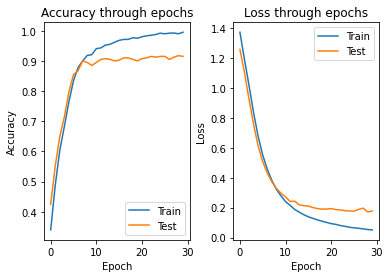

In [63]:
model_32_32 = run_clf("adam", [32, 32],
                      x_train_s, y_train, x_test_s, y_test,
                      30, 32, "model_32_32", callbacks=es)

#### *Dvoslojna mreža - (64, 64)*

Naredna arhitektura takođe predstavlja dvoslojnu mrežu i nastoji da poveća preciznost modela povećavanjem broja neurona u slojevima na 64. Može se uočiti da se predviđanje 2. i 3. klase poboljšalo, ali se i problem overfitting-a model takođe pogoršao.

In [ ]:
params_64_64 = {
    'optimizer': ['rmsprop', 'adam', 'sgd'],
    'layer_array': [(64, 64)],
    'epochs': [20, 30, 40],
    'batch_size': [32, 64]
}

grid_search(create_network, params_64_64, x_train_s, y_train)

Best parameters:  {'batch_size': 32, 'epochs': 20, 'layer_array': (64, 64), 'optimizer': 'rmsprop'}
Best score:  0.9100000143051148


Model: "model_64_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense0 (Dense)               (None, 64)                1344      
_________________________________________________________________
Dense1 (Dense)               (None, 64)                4160      
_________________________________________________________________
out (Dense)                  (None, 4)                 260       
Total params: 5,764
Trainable params: 5,764
Non-trainable params: 0
_________________________________________________________________
Accuracy:
 0.9225
Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       105
           1       0.88      0.92      0.90        91
           2       0.90      0.86      0.88        92
           3       0.95      0.93      0.94       112

    accuracy                           0.92       400
   macro avg       0.92      0

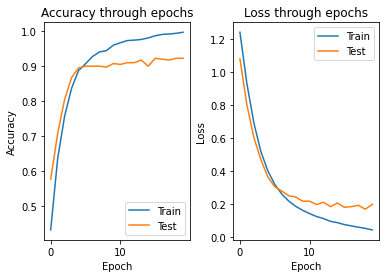

In [64]:
model_64_64 = run_clf("rmsprop", [64, 64],
                      x_train_s, y_train, x_test_s, y_test,
                      20, 32, "model_64_64", callbacks=es)

#### *Dvoslojna mreža - (128, 128)*

Kao što je i očekivano, dodatno povećavanje broja neurona u mreži prouzrokuje sve veći i veći *overfitting* problem, pri čemu se preciznost klasifikacije ne povećava. S obzirom na ovu obzervaciju, dalja razmatranja potencijalnih arhitektura mreža neće uključivati kompleksnije modele od prethodno opisanih.

In [ ]:
params_128_128 = {
    'optimizer': ['rmsprop', 'adam', 'sgd'],
    'layer_array': [(128, 128)],
    'epochs': [20, 30, 40],
    'batch_size': [32, 64]
}


grid_search(create_network, params_128_128, x_train_s, y_train)

Best parameters:  {'batch_size': 32, 'epochs': 20, 'layer_array': (128, 128), 'optimizer': 'rmsprop'}
Best score:  0.9143749952316285


Model: "model_128_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense0 (Dense)               (None, 128)               2688      
_________________________________________________________________
Dense1 (Dense)               (None, 128)               16512     
_________________________________________________________________
out (Dense)                  (None, 4)                 516       
Total params: 19,716
Trainable params: 19,716
Non-trainable params: 0
_________________________________________________________________
Epoch 00014: early stopping
Accuracy:
 0.915
Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       105
           1       0.90      0.90      0.90        91
           2       0.86      0.84      0.85        92
           3       0.94      0.91      0.93       112

    accuracy                           0.92       400

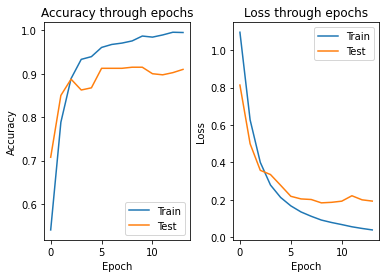

In [66]:
model_128_128 = run_clf("rmsprop", [128, 128],
                      x_train_s, y_train, x_test_s, y_test,
                      20, 32, "model_128_128", callbacks=es)

#### *Dvoslojna mreža - (32, 64)*

Sledeća arhitektura može se smatrati "između" prva dva razmatrana modela. Kompleksnost modela je smanjena u cilju smanjenja *overfitting*-a, a pokušaja održanja preciznosti klasifikacije drugog modela. Ova arhitektura se pokazuje kao trenutno najbolja u odnosu na prethodno predložene.

In [123]:
params_32_64 = {
    'optimizer': ['rmsprop', 'adam', 'sgd'],
    'layer_array': [(32, 64)],
    'epochs': [20, 30, 40],
    'batch_size': [32, 64]
}


grid_search(create_network, params_32_64, x_train_s, y_train)

Best parameters:  {'batch_size': 32, 'epochs': 30, 'layer_array': (32, 64), 'optimizer': 'rmsprop'}
Best score:  0.9062500119209289


Model: "model_32_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense0 (Dense)               (None, 32)                672       
_________________________________________________________________
Dense1 (Dense)               (None, 64)                2112      
_________________________________________________________________
out (Dense)                  (None, 4)                 260       
Total params: 3,044
Trainable params: 3,044
Non-trainable params: 0
_________________________________________________________________
Epoch 00022: early stopping
Accuracy:
 0.9275
Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       105
           1       0.87      0.92      0.89        91
           2       0.90      0.89      0.90        92
           3       0.96      0.96      0.96       112

    accuracy                           0.93       400
  

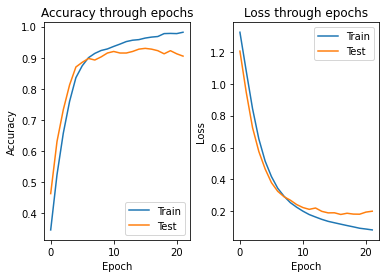

In [68]:
model_32_64 = run_clf("rmsprop", [32, 64],
                      x_train_s, y_train, x_test_s, y_test,
                      40, 32, "model_32_64", callbacks=es)

#### *Troslojna mreža - (32, 32, 32)*

Dalje, testirana je arhitektura koja sadrži ukupan broj neurona kao prethodna arhitektura ali raspoređenih u 3 umesto 2 sloja. Ova arhitektura daje relativno slične (minorno slabije) rezultate u odnosu na prethodnu. 

In [ ]:
params_32_32_32 = {
    'optimizer': ['rmsprop', 'adam', 'sgd'],
    'layer_array': [(32, 32, 32)],
    'epochs': [20, 30, 40],
    'batch_size': [32, 64]
}


grid_search(create_network, params_32_32_32, x_train_s, y_train)

Best parameters:  {'batch_size': 32, 'epochs': 30, 'layer_array': (32, 32, 32), 'optimizer': 'adam'}
Best score:  0.9018749952316284


Model: "model_32_32_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense0 (Dense)               (None, 32)                672       
_________________________________________________________________
Dense1 (Dense)               (None, 32)                1056      
_________________________________________________________________
Dense2 (Dense)               (None, 32)                1056      
_________________________________________________________________
out (Dense)                  (None, 4)                 132       
Total params: 2,916
Trainable params: 2,916
Non-trainable params: 0
_________________________________________________________________
Epoch 00019: early stopping
Accuracy:
 0.9225
Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       105
           1       0.92      0.91      0.92        91
           2       0.88      0

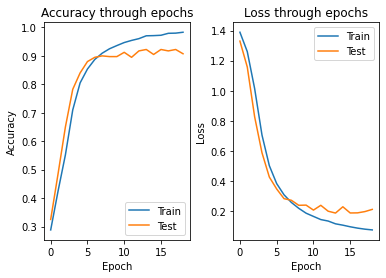

In [69]:
model_32_32_32 = run_clf("adam", [32, 32, 32],
                      x_train_s, y_train, x_test_s, y_test,
                      30, 32, "model_32_32_32", callbacks=es)

#### *Troslojna mreža - (32, 32, 64)*

Ova mreža eksperimentiše sa brojem slojeva, zadržavajući broj neurona kao dvoslojna 64,64 mreža (s obzirom da je i ona dala relativno zadovoljavajuće rezultate). Ova mreža daje značajno lošije rezultate.

In [ ]:
params_32_32_64 = {
    'optimizer': ['rmsprop', 'adam', 'sgd'],
    'layer_array': [(32, 32, 64)],
    'epochs': [20, 30, 40],
    'batch_size': [32]
}


grid_search(create_network, params_32_32_64, x_train_s, y_train)

Best parameters:  {'batch_size': 32, 'epochs': 20, 'layer_array': (32, 32, 64), 'optimizer': 'adam'}
Best score:  0.8993749976158142


Model: "model_32_32_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense0 (Dense)               (None, 32)                672       
_________________________________________________________________
Dense1 (Dense)               (None, 32)                1056      
_________________________________________________________________
Dense2 (Dense)               (None, 64)                2112      
_________________________________________________________________
out (Dense)                  (None, 4)                 260       
Total params: 4,100
Trainable params: 4,100
Non-trainable params: 0
_________________________________________________________________
Epoch 00020: early stopping
Accuracy:
 0.8925
Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       105
           1       0.84      0.87      0.85        91
           2       0.84      0

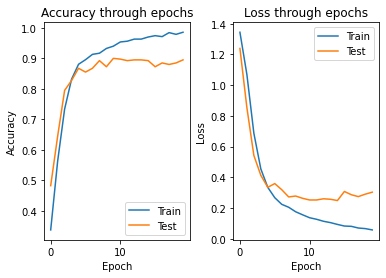

In [70]:
model_32_32_64 = run_clf("adam", [32, 32, 64],
                      x_train_s, y_train, x_test_s, y_test,
                      20, 32, "model_32_32_64", callbacks=es)

#### *Troslojna mreža - (16, 32, 64)*

Poslednji razmatran model ispituje da li manji broj neurona sa većim brojem slojeva može da da bolje rezultate u odnosu na prethodno prikazane arhitekture. Iz prikazanih rezultata, može se zaključiti da rešavanje datog problema ne zahteva korišćenje troslojne mreže.

In [ ]:
params_16_32_64 = {
    'optimizer': ['rmsprop', 'adam', 'sgd'],
    'layer_array': [(16, 32, 64)],
    'epochs': [20, 30, 40],
    'batch_size': [32, 64]
}


grid_search(create_network, params_16_32_64, x_train_s, y_train)

Best parameters:  {'batch_size': 32, 'epochs': 40, 'layer_array': (16, 32, 64), 'optimizer': 'adam'}
Best score:  0.8962499976158143


Model: "model_16_32_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense0 (Dense)               (None, 16)                336       
_________________________________________________________________
Dense1 (Dense)               (None, 32)                544       
_________________________________________________________________
Dense2 (Dense)               (None, 64)                2112      
_________________________________________________________________
out (Dense)                  (None, 4)                 260       
Total params: 3,252
Trainable params: 3,252
Non-trainable params: 0
_________________________________________________________________
Epoch 00025: early stopping
Accuracy:
 0.9175
Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       105
           1       0.87      0.93      0.90        91
           2       0.88      0

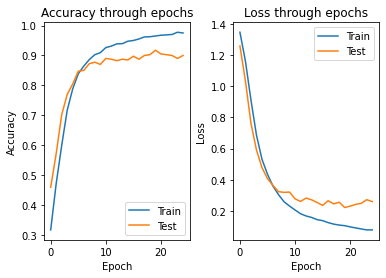

In [72]:
model_16_32_64 = run_clf("adam", [16, 32, 64],
                      x_train_s, y_train, x_test_s, y_test,
                      40, 32, "model_16_32_64", callbacks=es)

**Nakon eksperimentisanja sa prethodno opisanim arhitekturama modela može se zaključiti da najbolje rezultate daju dvoslojne (64, 64) i (32, 64) mreže, pri čemu obe arhitekture pate od problema overfitting-a, te će nadalje te arhitekture biti razmatrane.**

### ***Smanjenje overfitting-a***

Uz tehniku ranog zaustavljanja, još dve metode (regularizacija kernela i dropout) biće isprobane ne bi li se smanjio overfitting korišćenih modela.

#### *Arhitektura (64, 64) - Regularizacija kernela*

Regularizacija težina slojeva ove arhitekture značajno je smanjila problem overfitting-a. Takođe, preciznost modela se poboljšala, te će dati parametar biti uključen u dalja razmatranja.

Model: "model_64_64_reg"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense0 (Dense)               (None, 64)                1344      
_________________________________________________________________
Dense1 (Dense)               (None, 64)                4160      
_________________________________________________________________
out (Dense)                  (None, 4)                 260       
Total params: 5,764
Trainable params: 5,764
Non-trainable params: 0
_________________________________________________________________
Accuracy:
 0.955
Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       105
           1       0.90      0.98      0.94        91
           2       0.96      0.92      0.94        92
           3       0.98      0.96      0.97       112

    accuracy                           0.95       400
   macro avg       0.95    

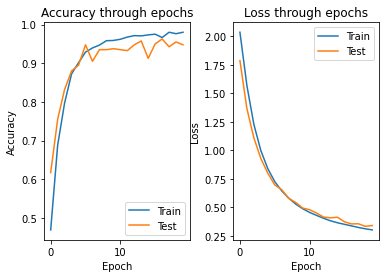

In [78]:
model_64_64_reg = run_clf("rmsprop", [64, 64],
                      x_train_s, y_train, x_test_s, y_test,
                      20, 32, "model_64_64_reg", callbacks=es, reg=0.01)

#### *Arhitektura (32, 64) - Regularizacija kernela*

Slično, regularizacija kernela pomogla je u rešavanju prethodno navedenih problema i u slučaju ove arhitekture.

Model: "model_32_64_reg"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense0 (Dense)               (None, 32)                672       
_________________________________________________________________
Dense1 (Dense)               (None, 64)                2112      
_________________________________________________________________
out (Dense)                  (None, 4)                 260       
Total params: 3,044
Trainable params: 3,044
Non-trainable params: 0
_________________________________________________________________
Accuracy:
 0.9525
Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       105
           1       0.92      0.93      0.93        91
           2       0.98      0.88      0.93        92
           3       0.96      0.99      0.97       112

    accuracy                           0.95       400
   macro avg       0.95   

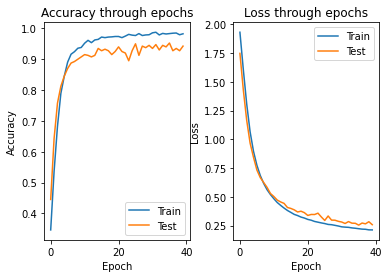

In [79]:
model_32_64_reg = run_clf("rmsprop", [32, 64],
                      x_train_s, y_train, x_test_s, y_test,
                      40, 32, "model_32_64_reg", callbacks=es, reg=0.01)

#### *Arhitektura (64, 64) - Dropout*

Dalje, isprobana je Dropout tehnika nad razmatranim arhitekturama. Korišćenje ove tehnike je pogoršalo rezultate nad trening skupom podataka. Pored toga, model prvo underfittuje (u prvih 10 epoha), a zatim značajno overfittuje, te data tehnika, u kombinaciji sa ovom arhitekturom, neće biti dalje razmatrana.

Model: "model_64_64_drop"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense0 (Dense)               (None, 64)                1344      
_________________________________________________________________
Dropout0 (Dropout)           (None, 64)                0         
_________________________________________________________________
Dense1 (Dense)               (None, 64)                4160      
_________________________________________________________________
Dropout1 (Dropout)           (None, 64)                0         
_________________________________________________________________
out (Dense)                  (None, 4)                 260       
Total params: 5,764
Trainable params: 5,764
Non-trainable params: 0
_________________________________________________________________
Epoch 00024: early stopping
Accuracy:
 0.9125
Report:
               precision    recall  f1-score   support

    

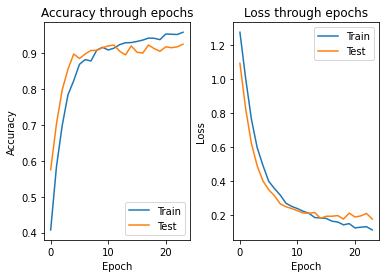

In [82]:
model_64_64_drop = run_clf("rmsprop", [64, 64],
                      x_train_s, y_train, x_test_s, y_test,
                      50, 32, "model_64_64_drop", callbacks=es, dropout=0.1)

#### *Arhitektura (32, 64) - Dropout*

Kao što je i očekivano, i ovaj model se ponaša slično prethodnom. Međutim, čini se da su razlika performansi modela nad trening i test skupovima podataka smanjila.

Model: "model_32_64_drop"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense0 (Dense)               (None, 32)                672       
_________________________________________________________________
Dropout0 (Dropout)           (None, 32)                0         
_________________________________________________________________
Dense1 (Dense)               (None, 64)                2112      
_________________________________________________________________
Dropout1 (Dropout)           (None, 64)                0         
_________________________________________________________________
out (Dense)                  (None, 4)                 260       
Total params: 3,044
Trainable params: 3,044
Non-trainable params: 0
_________________________________________________________________
Epoch 00037: early stopping
Accuracy:
 0.9325
Report:
               precision    recall  f1-score   support

    

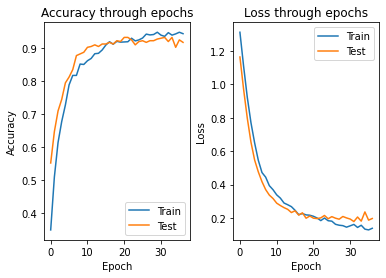

In [83]:
model_32_64_drop = run_clf("rmsprop", [32, 64],
                      x_train_s, y_train, x_test_s, y_test,
                      40, 32, "model_32_64_drop", callbacks=es, dropout=0.1)

Kako bi se proverilo prethodno zapažanje, pokušano je treniranje datog modela bez koriščenja ranog zaustavljanja. Finalno se zaključuje da korišćenje dropout-a ne poboljšava prethodno navedene probleme modela, već prozrokuje goru preciznost klasifikatora, te dalje neće biti razmatran.

Model: "model_32_64_drop_no_es"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense0 (Dense)               (None, 32)                672       
_________________________________________________________________
Dropout0 (Dropout)           (None, 32)                0         
_________________________________________________________________
Dense1 (Dense)               (None, 64)                2112      
_________________________________________________________________
Dropout1 (Dropout)           (None, 64)                0         
_________________________________________________________________
out (Dense)                  (None, 4)                 260       
Total params: 3,044
Trainable params: 3,044
Non-trainable params: 0
_________________________________________________________________
Accuracy:
 0.91
Report:
               precision    recall  f1-score   support

           0       0.93     

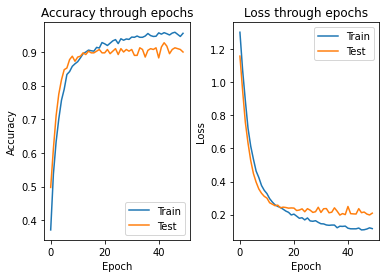

In [84]:
model_32_64_drop_no_es = run_clf("rmsprop", [32, 64],
                      x_train_s, y_train, x_test_s, y_test,
                      50, 32, "model_32_64_drop_no_es", dropout=0.1)

**Zaključuje se da korišćenje regularizacije težina kernela poboljšava date klasifikatore, dok dropout daje lošije performanse, te će na dalje uz date arhitekture biti korišćena samo regularizacija kernela.** 

### ***Redukcija dimenzionalnosti (PCA)***

Prethodno je pokazano da su određeni atributi visoko korelisani, što bi moglo da utiče na performanse klasifikatora. Metoda kojom je pokušano rešavanje datog problema je Principal Component Analysis (PCA).

In [85]:
def pca_selection(x_train, x_test, num_features):
    pca = PCA(n_components=num_features, random_state=200, whiten=True)
    pca.fit(x_train)

    x_train = pca.transform(x_train)
    x_test = pca.transform(x_test)

    var_ratio = pca.explained_variance_ratio_*100
    print("Variance ratio - PCA\n", var_ratio)
    print("Total variance - PCA: ", np.sum(var_ratio))

    return x_train, x_test, var_ratio

def plot_pca(variance):
    plt.plot(variance)
    plt.xlabel('Number of components')
    plt.ylabel("Variance")

Prvo će biti pokrenuta PCA selekcija sa svim fičerima, ne bi li se utvrdio odgovarajući broj principalnih komponenti. Međutim, dijagram pokazuje da bi trebalo zadržati sve principalne komponente, te se ne može izvršiti redukcija dimenzionalnosti bez gubitka varijanse.

Variance ratio - PCA
 [8.43380658 8.15660026 7.77669867 7.23161527 5.69477966 5.52717772
 5.41941349 5.17997685 5.09128642 4.95052468 4.87276637 4.8198828
 4.69654899 4.66521025 4.43531185 4.32936917 2.51712511 2.4131152
 2.06022177 1.72856889]
Total variance - PCA:  99.99999999999999


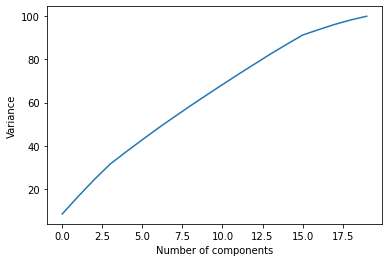

In [95]:
x_train_pca, x_test_pca, var_ratio = pca_selection(x_train_s, x_test_s,
                                                   input_shape)
plot_pca(np.cumsum(var_ratio))

Ipak, pređašnji modeli će biti testirani nad ovako transformisanim podacima, ne bi li se utvrdilo da li se performanse klasifikatora mogu poboljšati mapiranjem fičera na drugačiji koordinatni sistem.

In [107]:
x_train_pca_s, x_test_pca_s = scale_features(x_train_pca, x_test_pca)

#### *Arhitektura (64, 64) - PCA*

Pokazuje se da ovaj model, uz korišćenje PCA, daje malo slabije rezultate u odnosu na model treniran nad regularnim podacima.  

In [112]:
grid_search(create_network, params_64_64, x_train_pca_s, y_train)

Best parameters:  {'batch_size': 64, 'epochs': 40, 'layer_array': (64, 64), 'optimizer': 'adam'}
Best score:  0.9174999952316284


Model: "model_64_64_pca"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense0 (Dense)               (None, 64)                1344      
_________________________________________________________________
Dense1 (Dense)               (None, 64)                4160      
_________________________________________________________________
out (Dense)                  (None, 4)                 260       
Total params: 5,764
Trainable params: 5,764
Non-trainable params: 0
_________________________________________________________________
Epoch 00049: early stopping
Accuracy:
 0.94
Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       105
           1       0.90      0.92      0.91        91
           2       0.95      0.88      0.92        92
           3       0.94      0.99      0.97       112

    accuracy                           0.94       400


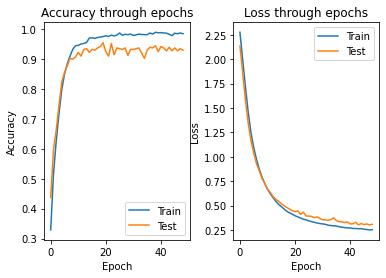

In [120]:
model_64_64_pca = run_clf("adam", [64, 64],
                      x_train_pca_s, y_train, x_test_pca_s, y_test,
                      50, 64, "model_64_64_pca", callbacks=es, reg=0.01)

Dodavanje dropout-a datom modelu je smanjilo overfitting, pri čemu je preciznost ostala ista. Može se zaključiti da korišćenje dropout-a uz PCA daje bolje rezultate.

Model: "model_64_64_pca_drop"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense0 (Dense)               (None, 64)                1344      
_________________________________________________________________
Dropout0 (Dropout)           (None, 64)                0         
_________________________________________________________________
Dense1 (Dense)               (None, 64)                4160      
_________________________________________________________________
Dropout1 (Dropout)           (None, 64)                0         
_________________________________________________________________
out (Dense)                  (None, 4)                 260       
Total params: 5,764
Trainable params: 5,764
Non-trainable params: 0
_________________________________________________________________
Accuracy:
 0.94
Report:
               precision    recall  f1-score   support

           0       0.94      0

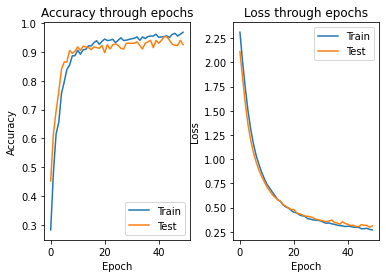

In [122]:
model_64_64_pca_drop = run_clf("adam", [64, 64],
                      x_train_pca_s, y_train, x_test_pca_s, y_test,
                      50, 64, "model_64_64_pca_drop", 
                      callbacks=es, reg=0.01, dropout=0.1)

#### *Arhitektura (32, 64) - PCA*

Pokazuje se da korišćenje PCA daje relativno slične rezultate kao model treniran nad originalnim podacima.

In [124]:
grid_search(create_network, params_32_64, x_train_pca_s, y_train)

Best parameters:  {'batch_size': 32, 'epochs': 40, 'layer_array': (32, 64), 'optimizer': 'adam'}
Best score:  0.9056250095367432


Model: "model_32_64_pca"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense0 (Dense)               (None, 32)                672       
_________________________________________________________________
Dense1 (Dense)               (None, 64)                2112      
_________________________________________________________________
out (Dense)                  (None, 4)                 260       
Total params: 3,044
Trainable params: 3,044
Non-trainable params: 0
_________________________________________________________________
Epoch 00044: early stopping
Accuracy:
 0.9475
Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       105
           1       0.91      0.92      0.92        91
           2       0.93      0.93      0.93        92
           3       0.99      0.96      0.97       112

    accuracy                           0.95       40

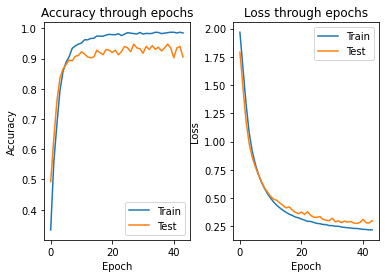

In [131]:
model_32_64_pca = run_clf("adam", [32, 64],
                      x_train_pca_s, y_train, x_test_pca_s, y_test,
                      50, 32, "model_32_64_pca", callbacks=es, reg=0.01)

Dodavanje dropout-a ovom modelu smanjuje razliku između performansi nad trening i test skupovima podataka, pri čemu se preciznost minorno pogoršala. Uprkos pogoršanju preciznosti, ovaj model će biti izabran kao superiorniji (u odnosu na model bez PCA), zbog svoje povećane stabilnosti.


Model: "model_32_64_pca_drop"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense0 (Dense)               (None, 32)                672       
_________________________________________________________________
Dropout0 (Dropout)           (None, 32)                0         
_________________________________________________________________
Dense1 (Dense)               (None, 64)                2112      
_________________________________________________________________
Dropout1 (Dropout)           (None, 64)                0         
_________________________________________________________________
out (Dense)                  (None, 4)                 260       
Total params: 3,044
Trainable params: 3,044
Non-trainable params: 0
_________________________________________________________________
Accuracy:
 0.9475
Report:
               precision    recall  f1-score   support

           0       0.94     

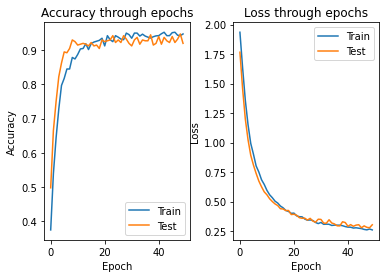

In [132]:
model_32_64_pca_drop = run_clf("adam", [32, 64],
                      x_train_pca_s, y_train, x_test_pca_s, y_test,
                      50, 32, "model_32_64_pca_drop",
                      callbacks=es, reg=0.01, dropout=0.1)

**Zaključuje se u slučaju arhitekture (32, 64) korišćenje PCA, uz dropout tehniku, stabilizuje model, dok ne daje značajno poboljšanje (64, 64) mreži.**

### ***Vizuelizacija modela***

Finalno, moguće je vizuelizovati modele koji su se najbolje pokazali pri datoj klasifikaciji.

#### *Arhitektura (64, 64)*

Dvoslojna mreža sa arhitekturom (64, 64) i regularizacijom kernela pokazala se kao najuspešnija u ovom klasifikacionom problemu, sa najboljim performansama na trening i test skupovima podataka.

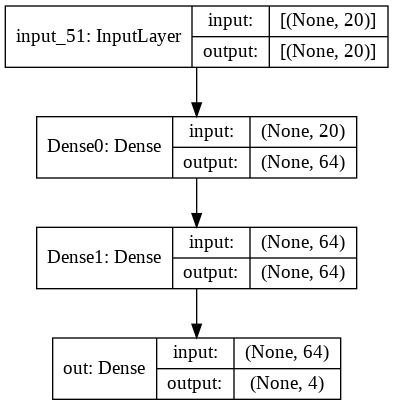

In [138]:
plot_model(model_64_64_reg, show_shapes=True)

#### *Arhitektura (32, 64) - PCA - Dropout*

Dvoslojna mreža sa arhitekturom (32, 64), regularizacijom kernela i dropout-om, u kombinaciji sa PCA, ispostavlja se kao takođe relativno uspešna (daje za nijansu gore rezultate u odnosu na (64, 64) model ali je stabilnija). 

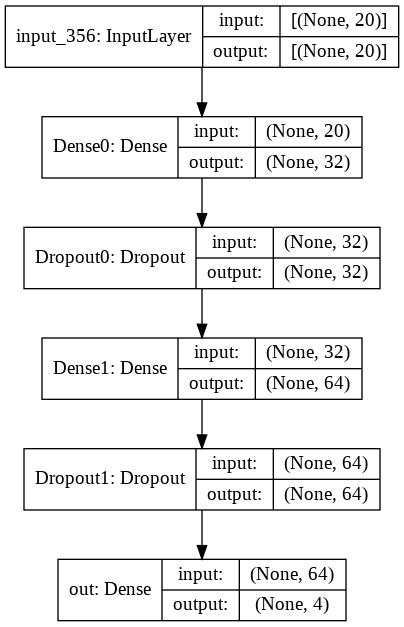

In [136]:
plot_model(model_32_64_pca_drop, show_shapes=True)

### ***Zaključak***
U ovom notebook-u demonstrirano je korišćenje više različitih arhitektura mreža u cilju klasifikacije cene mobilnih telefona na osnovu određenih karakteristika. Glavni izazov predstavljao je odabir povoljne arhitekture za dati problem, pri čemu je utvrđeno da dvoslojna mreža daje najbolje rezultate. Pored toga, značajan problem predstavljali su fenomeni overfitting-a i underfitting-a, te je nekoliko različitih tehnika pokušano u nadi njihovih prevazilaženja. Na kraju, pronađene su dve arhitekture koje daju solidne, približno jednake, rezultate za ovaj klasifikacioni problem.